# Ford GoBike System Dataset Investigation
## by Aya Tarek

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Read the Dataset file
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#The shape of the Dataset (number of rows, number of columns)
df.shape

(183412, 16)

In [4]:
#Check the column names
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [5]:
#Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#Dataset Description 
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

> There are 183412 GoBike trip in the dataset with 16 features to describe the trip:
> * an ID number for each bicycle
> * how long it was rented for, in seconds
> * the beginning and end staton ID, latitude, longitude and station name
> * the start and end time
> * the year the user was born
> * the gender of the user
> * whether the user has a subscription to the service or not

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in finding the features that effect the duration of the trip!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the distance may effect the duration as long distance gives higher duration, the user type may effect the duration as the subscriber may take higher duration than the customer mabye the age of the member and the gender had their effects too!

## Cleaning the data

In [7]:
#Copy the Dataset for Dataset cleaning
df_1 = df.copy()

In [8]:
#Remove unnecessary features
df_1.drop(['start_time', 'end_time', 'bike_id', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name'], axis=1, inplace=True)
df_1.head()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,37.789625,-122.400811,37.794231,-122.402923,Customer,1984.0,Male,No
1,42521,37.791464,-122.391034,37.775880,-122.393170,Customer,NaN,NaN,No
2,61854,37.769305,-122.426826,37.786375,-122.404904,Customer,1972.0,Male,No
3,36490,37.774836,-122.446546,37.773311,-122.444293,Subscriber,1989.0,Other,No
4,1585,37.804562,-122.271738,37.792714,-122.248780,Subscriber,1974.0,Male,Yes


In [9]:
#Drop the NAN rows
df_1.dropna(inplace=True)
df_1.isnull().sum().any()

False

In [10]:
#Change the Age Column from year to age
df_1['member_Age'] = df_1['member_birth_year']
df_1['member_Age'] = 2021 - df_1['member_birth_year'].astype(int)
df_1['member_Age']

0         37
2         49
3         32
4         47
5         62
          ..
183407    25
183408    37
183409    31
183410    33
183411    32
Name: member_Age, Length: 175147, dtype: int32

In [11]:
#Description of the member Age column 
df_1['member_Age'].describe()

count    175147.000000
mean         36.193563
std          10.116689
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: member_Age, dtype: float64

In [12]:
#change duration_sec to Hours, as the visualization will be easier to interpret
df_1['duration_minutes'] = df_1['duration_sec'] / 60

In [13]:
#Description of the duration minutes column
df_1['duration_minutes'].describe()

count    175147.000000
mean         11.736864
std          27.360139
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_minutes, dtype: float64

In [14]:
#Drop the duration_sec and member_birth_year as it replaced with duration_minutes and member_Age
df_1.drop(['duration_sec', 'member_birth_year'], axis=1, inplace=True)

In [15]:
#change user_type and gender to category type
df_1.user_type = df_1.user_type.astype('category')
df_1.member_gender = df_1.member_gender.astype('category')

In [16]:
#Calculate the distance in kilometers, based on the longitude and latitude start and end points.
import math
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
* math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

In [17]:
#Add the  distance column to the datafram
df_1['distance'] = df_1.apply(lambda i: distance([i['start_station_longitude'],i['start_station_latitude']],
                            [i['end_station_longitude'],i['end_station_latitude']]), axis=1)

In [18]:
#Check the Dataset upgrade
df_1.head()

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,member_gender,bike_share_for_all_trip,member_Age,duration_minutes,distance
0,37.789625,-122.400811,37.794231,-122.402923,Customer,Male,No,37,869.750000,0.361191
2,37.769305,-122.426826,37.786375,-122.404904,Customer,Male,No,49,1030.900000,2.641372
3,37.774836,-122.446546,37.773311,-122.444293,Subscriber,Other,No,32,608.166667,0.266543
4,37.804562,-122.271738,37.792714,-122.248780,Subscriber,Male,Yes,47,26.416667,2.647945
5,37.770407,-122.391198,37.798014,-122.405950,Subscriber,Male,No,62,29.883333,2.322918


## Univariate Exploration


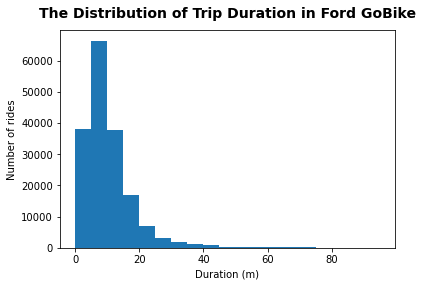

In [19]:
#Plot a histigram to explore the the distribution of the duration minutes column
bin_edges = np.arange(0, 100, 5)
plt.hist(data = df_1, x = 'duration_minutes', bins = bin_edges)

plt.title("The Distribution of Trip Duration in Ford GoBike", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Duration (m)')
plt.ylabel('Number of rides');

> The histogram indicates that the majority of trips are less than 20 minutes long. The distribution is skewed to the right (positively skewed).

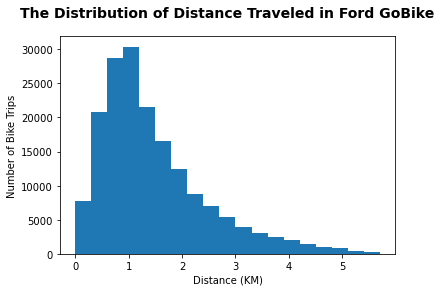

In [21]:
#Plot a histigram to explore the the distribution of the distance column
bin_edges = np.arange(0, 6, 0.3)
plt.hist(data = df_1, x = 'distance', bins = bin_edges)
plt.title("The Distribution of Distance Traveled in Ford GoBike", y = 1.06, fontsize=14, fontweight='semibold')
plt.xlabel('Distance (KM)')
plt.ylabel('Number of Bike Trips');

> The distance traveled histogram shows a right-skew (positive skew) to shorter rides.

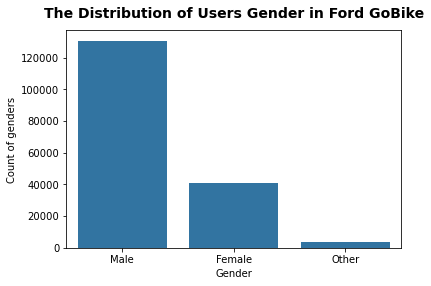

In [22]:
#Plot a count plot to explore the the distribution of the member gender column
base_color = sb.color_palette()[0]
freq = df_1['member_gender'].value_counts().index
sb.countplot(data=df_1, x='member_gender', color=base_color, order=freq);
plt.xlabel('Gender')
plt.ylabel('Count of genders');
plt.title("The Distribution of Users Gender in Ford GoBike", y=1.03, fontsize=14, fontweight='semibold');

> As shown in the bar chart the majority of the Users are males.

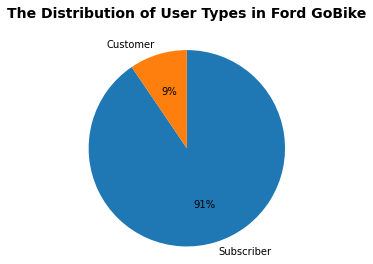

In [25]:
#Plot a pie chart to explore the distribution of the user type column
sorted_counts = df_1['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.0f%%', startangle=90, counterclock = False);
plt.title("The Distribution of User Types in Ford GoBike", fontsize=14, y=1.07, fontweight='semibold')
plt.axis('square');


> As shown in the pie chart The majority of the Users are subscribers, at 91%.

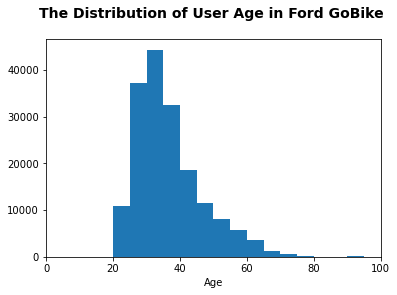

In [26]:
#Plot a histogram to explore the distribution of the member age column
bins = np.arange(0, df_1['member_Age'].max()+5, 5)
plt.hist(data = df_1, x = 'member_Age',bins=bins);
plt.xlim((0,100))
plt.xlabel( 'Age');
plt.title("The Distribution of User Age in Ford GoBike ", fontsize=14, y=1.07, fontweight='semibold');

> The Age of the users histogram shows a right-skew (positive skew) to the range between 20 years and 40 years.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution is skewed to the right (positively skewed).There is some outliers shown in the histogram. No transformation needed as the seconds were convert to minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> the only adjst performed is the limit of the x-axis to avoid the effect of the outliers!

## Bivariate Exploration



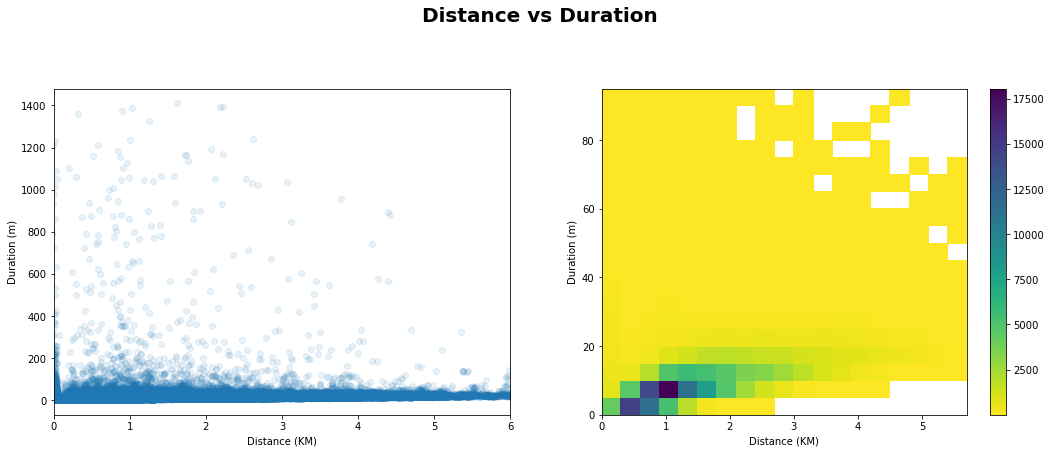

In [28]:
#Plot a scatter plot and heat map to explore the relation between duration and distance
bins_x = np.arange(0, 6, 0.3)
bins_y = np.arange(0, 100, 5)

plt.figure(figsize = [18, 6])

plt.subplot(1, 2, 1)
sb.regplot(data = df_1, x = 'distance', y = 'duration_minutes', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlim([0,6])
plt.xlabel('Distance (KM)')
plt.ylabel('Duration (m)');

plt.subplot(1, 2, 2)
plt.hist2d(data = df_1, x = 'distance', y = 'duration_minutes', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Distance (KM)')
plt.ylabel('Duration (m)');

plt.suptitle("Distance vs Duration", fontsize=20, y=1.07, fontweight='semibold' );

> There is no observed relation between the distance and duration shown in the scatter plot, the heat maps shows that the most of the rides with 1km distance takes 10m duration.

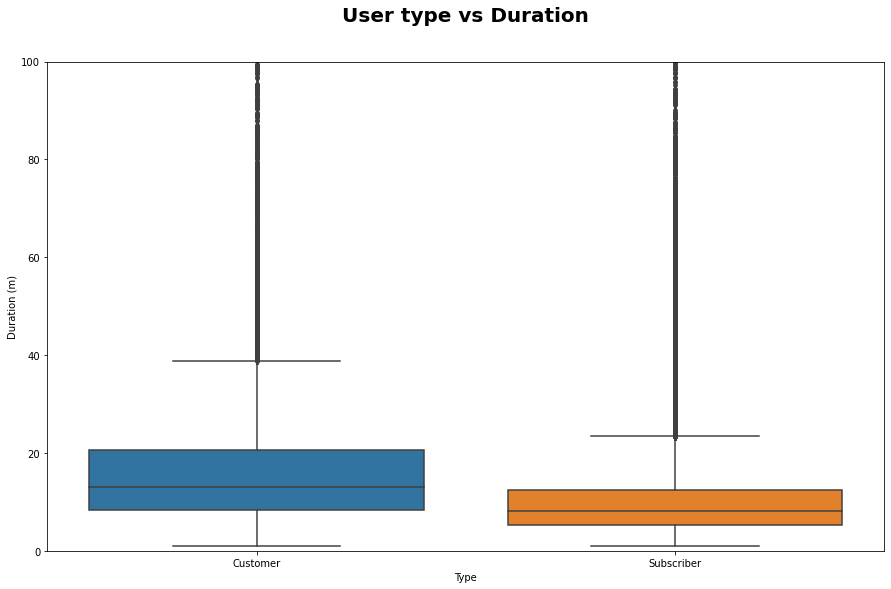

In [32]:
#Plot a box plot to explore the relation between the user type and duration 
plt.figure(figsize=(15,9))
sb.boxplot(data=df_1, x='user_type', y='duration_minutes');
plt.ylim([0,100]);
plt.xlabel('Type')
plt.ylabel('Duration (m)')
plt.title("User type vs Duration", fontsize=20, y=1.07, fontweight='semibold');

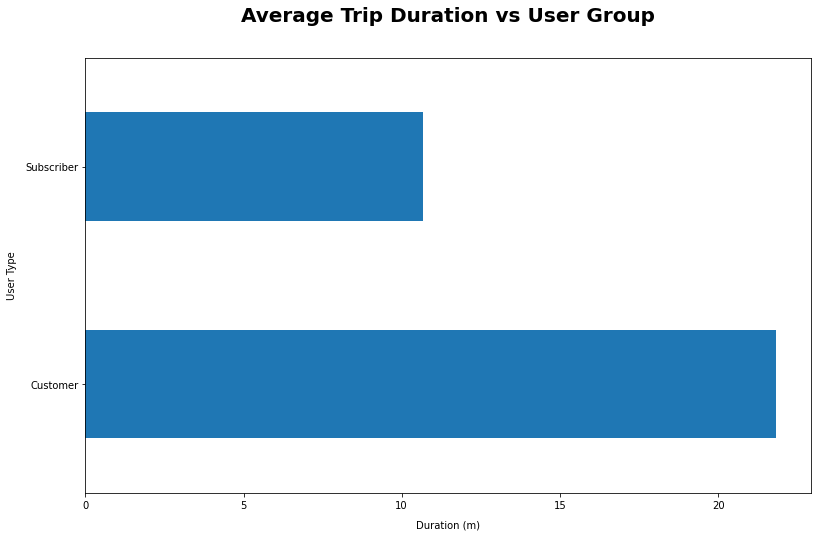

In [33]:
#Plot a bar chart to explore the relation between the user type and duration
ax = df_1.groupby('user_type')['duration_minutes'].mean().plot(kind='barh', figsize=(13,8))
ax.set_title('Average Trip Duration vs User Group', fontsize=20, y=1.07, fontweight='semibold')
ax.set_ylabel('User Type', labelpad=8)
ax.set_xlabel('Duration (m)', labelpad=10);

> The Customer users spend more duration than the Subscriber users

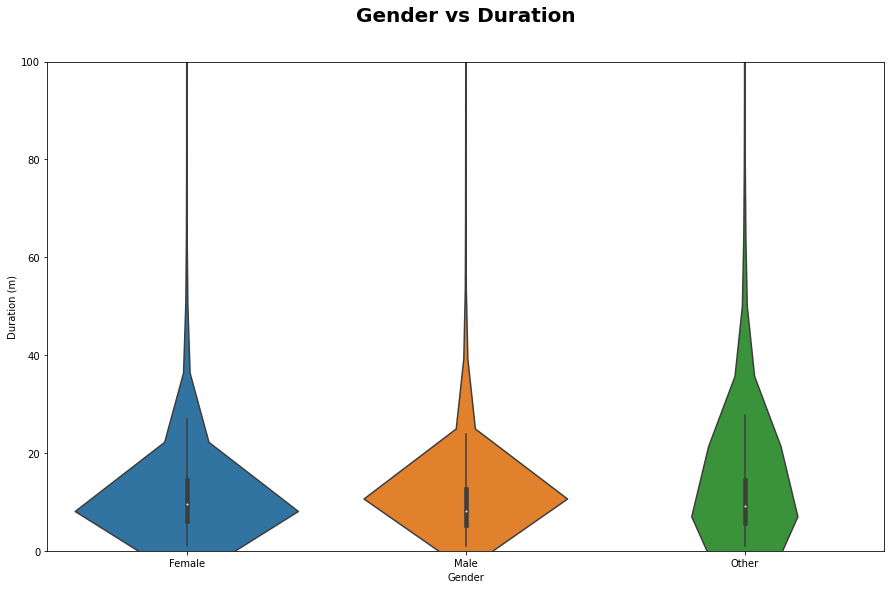

In [34]:
#Plot a violin plot to explore the relation between the user gender and duration
plt.figure(figsize=(15,9))
sb.violinplot(data=df_1, x='member_gender', y='duration_minutes');
plt.ylim([0,100]);
plt.xlabel('Gender')
plt.ylabel('Duration (m)')
plt.title("Gender vs Duration", fontsize=20, y=1.07, fontweight='semibold');

> Both male an female has the same Duration range the is different from the other gender.

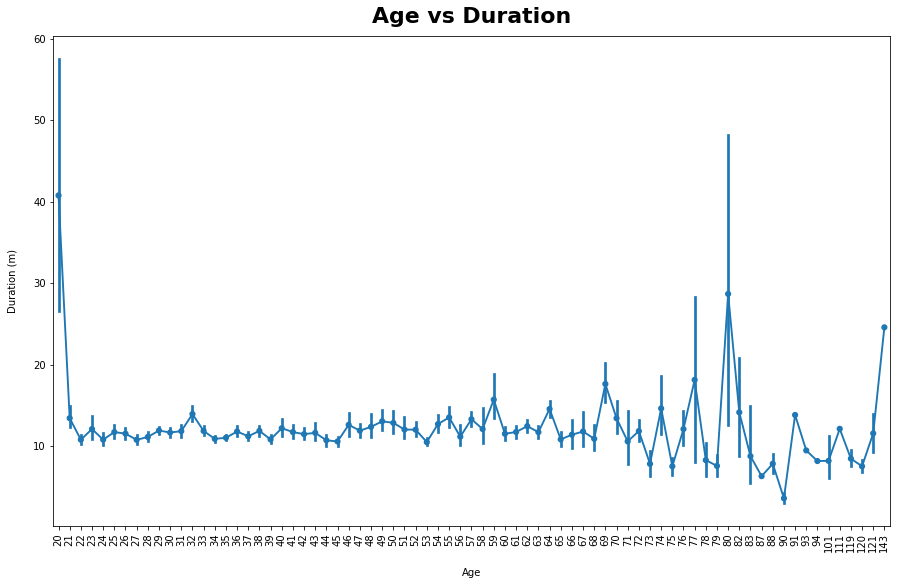

In [36]:
#Plot a violin plot to explore the relation between the user Age and duration
plt.figure(figsize=(15,9))
sb.pointplot(data = df_1, x='member_Age', y='duration_minutes', scale=.7)
plt.title('Age vs Duration', fontsize=22, y=1.015, fontweight='semibold')
plt.xlabel('Age', labelpad=16)
plt.ylabel('Duration (m)', labelpad=16)
plt.xticks(rotation = 90);

> This line graph shows that the oldest riders had the greatest fluctuation between the shorest and longest duration .

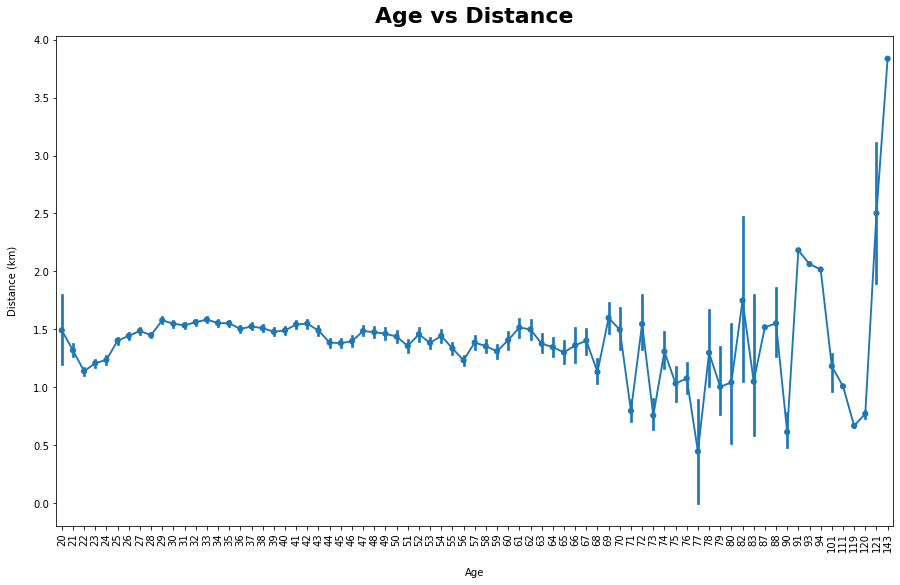

In [37]:
#Plot a violin plot to explore the relation between the user Age and distance
plt.figure(figsize=(15,9))
sb.pointplot(data = df_1, x='member_Age', y='distance', scale=.7)
plt.title('Age vs Distance', fontsize=22, y=1.015, fontweight='semibold')
plt.xlabel('Age', labelpad=16)
plt.ylabel('Distance (km)', labelpad=16);
plt.xticks(rotation = 90);

> This line graph shows that the oldest riders had the greatest fluctuation between the shorest and longest rides .

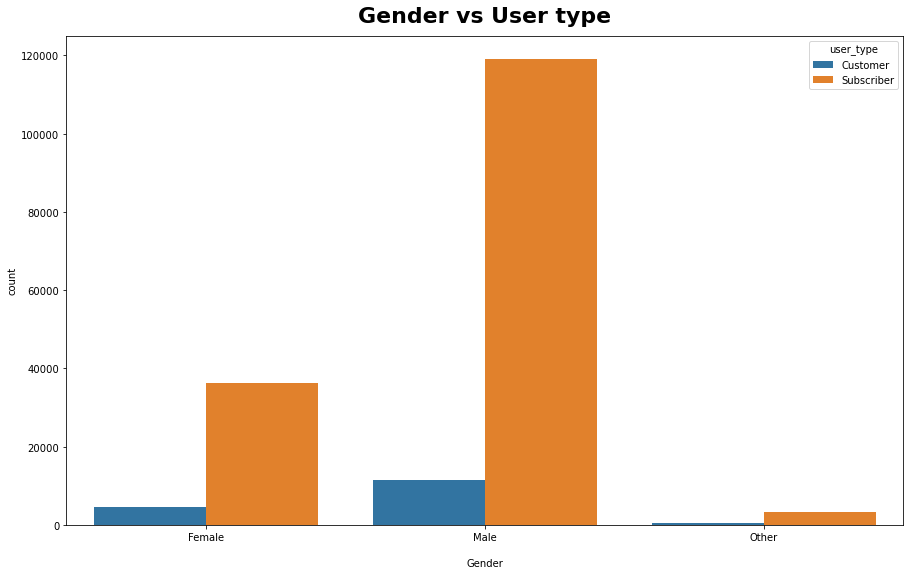

In [40]:
#Plot a violin plot to explore the relation between the user type and gender
plt.figure(figsize=(15,9))
sb.countplot(data = df_1, x = 'member_gender', hue = 'user_type');
plt.title('Gender vs User type', fontsize=22, y=1.015, fontweight='semibold')
plt.xlabel('Gender', labelpad=16);

> The Majority of the male users are subscribers. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It was very interset to discovre that customers spends more duration than the subscribers, But if you think of it as the customers don't usually going on bike trips as a result they spend more time, unlike the subscribers who going on bike trips more often, it seems more sense. However, it was surprising to see that customers, on average, take longer duration than subscribers

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The relationship between the member's age and length of ride is investigated with a line graph. The greatest fluctuation between the shorest and longest rides is with the older riders.!

## Multivariate Exploration


In [41]:
#Extract a sample from the dataset to explore the relations clearly
np.random.seed(2018)
sample=np.random.choice(df_1.shape[0], 200, replace=False)
df_1_subset=df_1.iloc[sample]


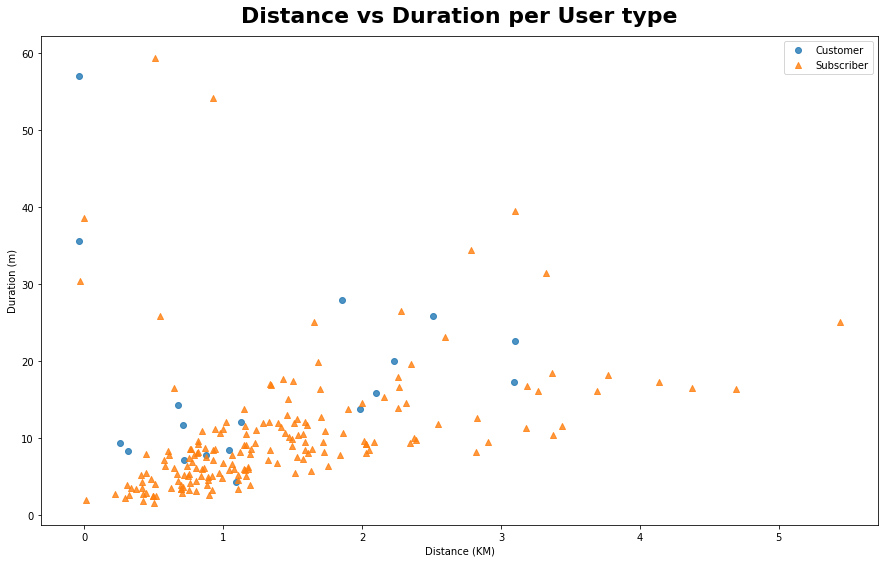

In [42]:
#Plot a scatter plot to explore the relation between distance and duration per User type
plt.figure(figsize=(15,9))
ttype_marker = [['Customer', 'o'], ['Subscriber', '^']]
for ttype, marker in ttype_marker:
    plot_data=df_1_subset.loc[df_1_subset['user_type']==ttype]
    sb.regplot(data = plot_data, x = 'distance', y = 'duration_minutes', x_jitter=0.04, fit_reg=False, marker=marker)
plt.xlabel('Distance (KM)')
plt.ylabel('Duration (m)');  
plt.title('Distance vs Duration per User type', fontsize=22, y=1.015, fontweight='semibold')
plt.legend(['Customer','Subscriber']);

> The Majority of the users are Subscribers with positive relationship between the Distance and the Duration

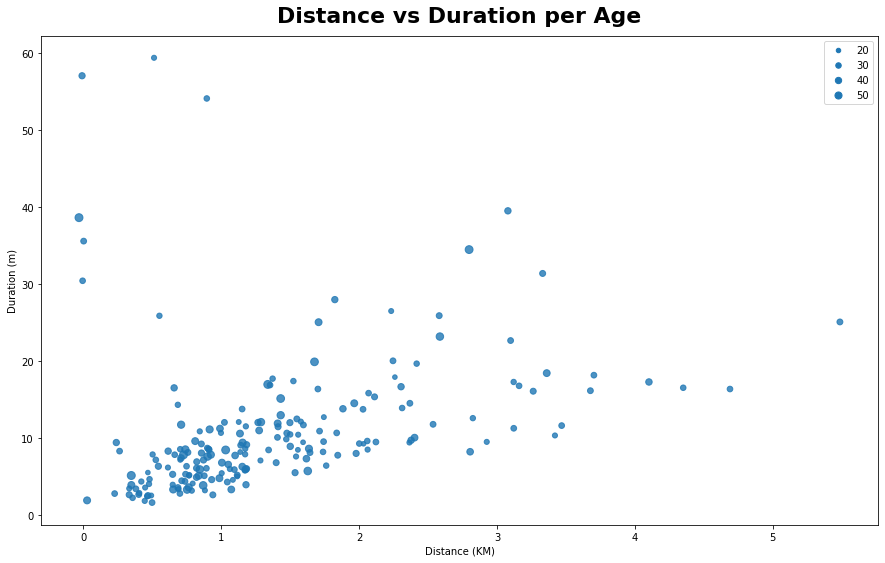

In [43]:
#Plot a scatter plot to explore the relation between distance and duration per Age
plt.figure(figsize=(15,9))
sb.regplot(data = df_1_subset, x = 'distance', y = 'duration_minutes',
           x_jitter=0.04, scatter_kws={'s':df_1_subset['member_Age']}, fit_reg=False)

# dummy series for adding legend
sizes = [20, 30, 40, 50]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes)
plt.title('Distance vs Duration per Age', fontsize=22, y=1.015, fontweight='semibold')
plt.xlabel('Distance (KM)')
plt.ylabel('Duration (m)');  

> The Majority of the users are between 20 and 40 years old with positive relationship between the Distance and the Duration

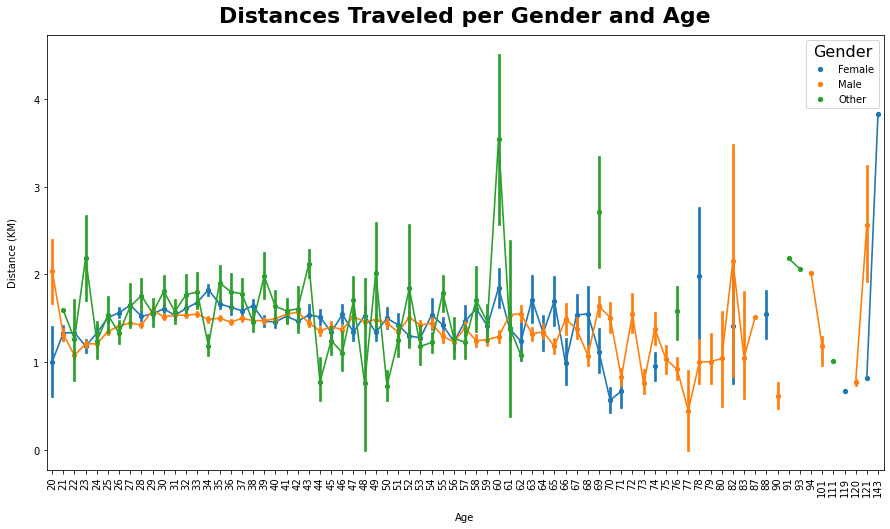

In [44]:
#Plot a point plot to explore the relation between distance per gender and Age
plt.figure(figsize=(15,8))
ax = sb.pointplot(x='member_Age', y='distance', hue='member_gender', scale=.6, data=df_1)
plt.title('Distances Traveled per Gender and Age', fontsize=22, y=1.015, fontweight='semibold')
plt.xlabel('Age', labelpad=16)
plt.ylabel('Distance (KM)', labelpad=16)
leg = ax.legend()
leg.set_title('Gender',prop={'size':16})
ax = plt.gca();
plt.xticks(rotation = 90);


> "other gender" category had the most outliers in the data, as well as ages over 50 years.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Most of the Users are Subscribers with positive relationship between the Distance and the Duration, thought this positive relation wasn't observed in the Bivariate exploration. Most of the age of users is between 20 and 40 years old with positive relation between Distance and the Duration.

### Were there any interesting or surprising interactions between features?

> It was surprising to note that the "other gender" category had the most outliers in the data, as well as ages over 50 years. 